In [1]:
%env CUDA_VISIBLE_DEVICES=1

env: CUDA_VISIBLE_DEVICES=1


In [20]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import tensorflow as tf
from tensorflow.keras.models import Model,Sequential, load_model,model_from_json

%matplotlib inline

In [3]:
tf.config.list_physical_devices('GPU')

[]

In [4]:
from facial_analysis import FacialImageProcessing
imgProcessing=FacialImageProcessing(False)

In [19]:
pwd

'/home/eason/Python/AI/Affectnet/face-emotion-recognition/EasonTest'

In [5]:
model=load_model('../models/affectnet_emotions/mobilenet_7.h5')
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1_pad (ZeroPadding2D)   (None, 225, 225, 3)       0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                           

In [6]:
def mobilenet_preprocess_input(x,**kwargs):
    x[..., 0] -= 103.939
    x[..., 1] -= 116.779
    x[..., 2] -= 123.68
    return x
preprocessing_function=mobilenet_preprocess_input
INPUT_SIZE = (224, 224)

In [7]:
idx_to_class={0: 'Anger', 1: 'Disgust', 2: 'Fear', 3: 'Happiness', 4: 'Neutral', 5: 'Sadness', 6: 'Surprise'}

In [9]:
frame_bgr = cv2.imread("./截圖 2021-09-13 下午7.41.42.png")

In [10]:
face_img = cv2.resize(frame_bgr,INPUT_SIZE)

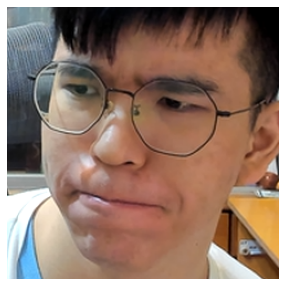

In [79]:
fpath = "/home/eason/Python/E_Practice/Focus+/test.png"
frame_bgr=cv2.imread(fpath)
plt.figure(figsize=(5, 5))
plt.axis('off')
frame = cv2.cvtColor(frame_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(frame)

In [80]:
frame.shape

(246, 246, 3)

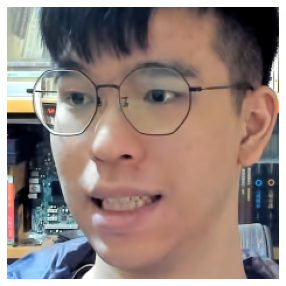

In [83]:
fpath = "./download.png"
frame_bgr=cv2.imread(fpath)
plt.figure(figsize=(5, 5))
plt.axis('off')
frame = cv2.cvtColor(frame_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(frame)

In [84]:
s = (frame.shape[1]-229)//2

Text(0.5, 1.0, 'Fear')

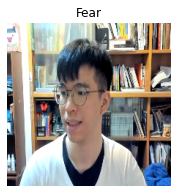

In [87]:
face_img=cv2.resize(frame[:, s:frame.shape[1]-s],INPUT_SIZE)
inp=face_img.astype(np.float32)
inp[..., 0] -= 103.939
inp[..., 1] -= 116.779
inp[..., 2] -= 123.68
inp = np.expand_dims(inp, axis=0)
scores=model.predict(inp)[0]
plt.figure(figsize=(3, 3))
plt.axis('off')
plt.imshow(face_img)
plt.title(idx_to_class[np.argmax(scores)])

In [65]:
scores

array([0.50349903, 0.11108948, 0.00144882, 0.04414105, 0.20664597,
       0.13118969, 0.00198603], dtype=float32)

In [66]:
idx_to_class

{0: 'Anger',
 1: 'Disgust',
 2: 'Fear',
 3: 'Happiness',
 4: 'Neutral',
 5: 'Sadness',
 6: 'Surprise'}

In [75]:
inp[..., 0]

array([[119., 128., 135., ...,   0.,   0.,   0.],
       [128., 132., 134., ...,   0.,   0.,   0.],
       [131., 130., 130., ...,   0.,   0.,   0.],
       ...,
       [138.,  90.,  86., ..., 115., 113., 112.],
       [141.,  96.,  90., ..., 115., 115., 114.],
       [144., 100.,  92., ..., 123., 116., 114.]], dtype=float32)

In [74]:
inp

array([[[119., 141., 154.],
        [128., 154., 167.],
        [135., 164., 177.],
        ...,
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.]],

       [[128., 151., 162.],
        [132., 157., 169.],
        [134., 162., 175.],
        ...,
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.]],

       [[131., 152., 163.],
        [130., 155., 166.],
        [130., 159., 171.],
        ...,
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.]],

       ...,

       [[138., 171., 194.],
        [ 90., 129., 158.],
        [ 86., 131., 166.],
        ...,
        [115.,  75.,  36.],
        [113.,  73.,  35.],
        [112.,  72.,  34.]],

       [[141., 171., 195.],
        [ 96., 133., 162.],
        [ 90., 135., 169.],
        ...,
        [115.,  74.,  35.],
        [115.,  75.,  36.],
        [114.,  74.,  36.]],

       [[144., 173., 197.],
        [100., 136., 165.],
        [ 92., 1

In [73]:
inp.max()

255.0

In [72]:
inp.min()

0.0

In [71]:
inp=face_img.astype(np.float32)

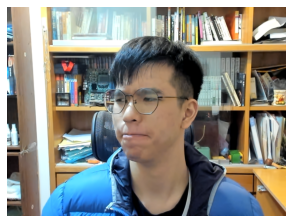

In [91]:
import matplotlib.pyplot as plt
fpath='../test_images/20180720_174416.jpg'
fpath = "./截圖 2021-09-13 下午7.41.42.png"
fpath = "./download.png"
frame_bgr=cv2.imread(fpath)
plt.figure(figsize=(5, 5))
plt.axis('off')
frame = cv2.cvtColor(frame_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(frame)
bounding_boxes, points = imgProcessing.detect_faces(frame)
points = points.T
for bbox,p in zip(bounding_boxes, points):
    box = bbox.astype(np.int)
    x1,y1,x2,y2=box[0:4]    
    face_img=frame[y1:y2,x1:x2,:]
    break
    face_img=cv2.resize(face_img,INPUT_SIZE)
    inp=face_img.astype(np.float32)
    inp[..., 0] -= 103.939
    inp[..., 1] -= 116.779
    inp[..., 2] -= 123.68
    inp = np.expand_dims(inp, axis=0)
    scores=model.predict(inp)[0]
    plt.figure(figsize=(3, 3))
    plt.axis('off')
    plt.imshow(face_img)
    plt.title(idx_to_class[np.argmax(scores)])

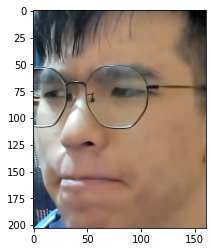

In [94]:
plt.imshow(face_img)

Text(0.5, 1.0, 'Happiness')

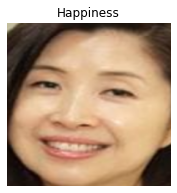

In [12]:
inp=face_img.astype(np.float32)
inp[..., 0] -= 103.939
inp[..., 1] -= 116.779
inp[..., 2] -= 123.68
inp = np.expand_dims(inp, axis=0)
scores=model.predict(inp)[0]
plt.figure(figsize=(3, 3))
plt.axis('off')
plt.imshow(face_img)
plt.title(idx_to_class[np.argmax(scores)])

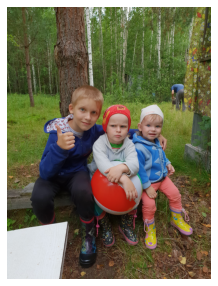

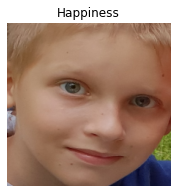

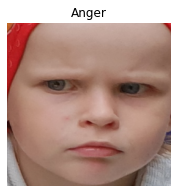

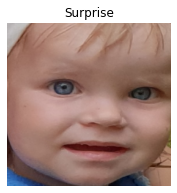

In [13]:
import matplotlib.pyplot as plt
fpath='../test_images/20180720_174416.jpg'
frame_bgr=cv2.imread(fpath)
plt.figure(figsize=(5, 5))
plt.axis('off')
frame = cv2.cvtColor(frame_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(frame)
bounding_boxes, points = imgProcessing.detect_faces(frame)
points = points.T
for bbox,p in zip(bounding_boxes, points):
    box = bbox.astype(np.int)
    x1,y1,x2,y2=box[0:4]    
    face_img=frame[y1:y2,x1:x2,:]
    
    face_img=cv2.resize(face_img,INPUT_SIZE)
    inp=face_img.astype(np.float32)
    inp[..., 0] -= 103.939
    inp[..., 1] -= 116.779
    inp[..., 2] -= 123.68
    inp = np.expand_dims(inp, axis=0)
    scores=model.predict(inp)[0]
    plt.figure(figsize=(3, 3))
    plt.axis('off')
    plt.imshow(face_img)
    plt.title(idx_to_class[np.argmax(scores)])

In [17]:
model

In [18]:
import tensorflowjs as tfjs
tfjs.converters.save_keras_model(model, "../models/mobilenet_tfjs")